In [95]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 5000)
pd.options.display.max_rows = 4000

import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
delays_Q4 = pd.read_csv('~/ga/projects/capstone_data/data/delaysQ4_2018.csv')

/Users/ilyakvyatkovskiy/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (49,77,78,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
delays_Q4.head()

,Unnamed: 0,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM,DIV3_AIRPORT,DIV3_AIRPORT_ID,DIV3_AIRPORT_SEQ_ID,DIV3_WHEELS_ON,DIV3_TOTAL_GTIME,DIV3_LONGEST_GTIME,DIV3_WHEELS_OFF,DIV3_TAIL_NUM,DIV4_AIRPORT,DIV4_AIRPORT_ID,DIV4_AIRPORT_SEQ_ID,DIV4_WHEELS_ON,DIV4_TOTAL_GTIME,DIV4_LONGEST_GTIME,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM,Unnamed: 109
0,0,2018,4,10,1,1,2018-10-01,WN,19393,WN,N221WN,802,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,35,New Mexico,86,10821,1082106,30852,BWI,"Baltimore, MD",MD,24,Maryland,35,905,903.0,-2.0,0.0,0.0,-1.0,0900-0959,10.0,913.0,1430.0,3.0,1450,1433.0,-17.0,0.0,0.0,-2.0,1400-1459,0.0,NaN,0.0,225.0,210.0,197.0,1.0,1670.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2018,4,10,1,1,2018-10-01,WN,19393,WN,N8329B,3744,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,35,New Mexico,86,10821,1082106,30852,BWI,"Baltimore, MD",MD,24,Maryland,35,1500,1458.0,-2.0,0.0,0.0,-1.0,1500-1559,8.0,1506.0,2017.0,3.0,2045,2020.0,-25.0,0.0,0.0,-2.0,2000-2059,0.0,NaN,0.0,225.0,202.0,191.0,1.0,1670.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2018,4,10,1,1,2018-10-01,WN,19393,WN,N920WN,1019,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,35,New Mexico,86,11259,1125904,30194,DAL,"Dallas, TX",TX,48,Texas,74,1800,1802.0,2.0,2.0,0.0,0.0,1800-1859,7.0,1809.0,2029.0,3.0,2045,2032.0,-13.0,0.0,0.0,-1.0,2000-2059,0.0,NaN,0.0,105.0,90.0,80.0,1.0,580.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2018,4,10,1,1,2018-10-01,WN,19393,WN,N480WN,1499,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,35,New Mexico,86,11259,1125904,30194,DAL,"Dallas, TX",TX,48,Texas,74,950,947.0,-3.0,0.0,0.0,-1.0,0900-0959,12.0,959.0,1220.0,3.0,1235,1223.0,-12.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,105.0,96.0,81.0,1.0,580.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2018,4,10,1,1,2018-10-01,WN,19393,WN,N227WN,3635,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,35,New Mexico,86,11259,1125904,30194,DAL,"Dallas, TX",TX,48,Texas,74,1150,1151.0,1.0,1.0,0.0,0.0,1100-1159,11.0,1202.0,1422.0,1.0,1430,1423.0,-7.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,

In [4]:
delays_Q4.shape

(1796121, 111)

In [5]:
delays_Q4.columns

Index(['Unnamed: 0', 'YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'FL_DATE', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER',
       ...
       'DIV4_TAIL_NUM', 'DIV5_AIRPORT', 'DIV5_AIRPORT_ID',
       'DIV5_AIRPORT_SEQ_ID', 'DIV5_WHEELS_ON', 'DIV5_TOTAL_GTIME',
       'DIV5_LONGEST_GTIME', 'DIV5_WHEELS_OFF', 'DIV5_TAIL_NUM',
       'Unnamed: 109'],
      dtype='object', length=111)

In [6]:
delays_Q4.columns = [column.lower() for column in delays_Q4.columns]

In [7]:
delays_Q4.columns

Index(['unnamed: 0', 'year', 'quarter', 'month', 'day_of_month', 'day_of_week',
       'fl_date', 'op_unique_carrier', 'op_carrier_airline_id', 'op_carrier',
       ...
       'div4_tail_num', 'div5_airport', 'div5_airport_id',
       'div5_airport_seq_id', 'div5_wheels_on', 'div5_total_gtime',
       'div5_longest_gtime', 'div5_wheels_off', 'div5_tail_num',
       'unnamed: 109'],
      dtype='object', length=111)

In [8]:
delays_Q4.drop(columns = ['unnamed: 0', 'year', 'quarter'], axis = 1, inplace=True)

In [9]:
delays_Q4.head()

,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_airline_id,op_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,origin_city_market_id,origin,origin_city_name,origin_state_abr,origin_state_fips,origin_state_nm,origin_wac,dest_airport_id,dest_airport_seq_id,dest_city_market_id,dest,dest_city_name,dest_state_abr,dest_state_fips,dest_state_nm,dest_wac,crs_dep_time,dep_time,dep_delay,dep_delay_new,dep_del15,dep_delay_group,dep_time_blk,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,arr_delay_new,arr_del15,arr_delay_group,arr_time_blk,cancelled,cancellation_code,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,div_airport_landings,div_reached_dest,div_actual_elapsed_time,div_arr_delay,div_distance,div1_airport,div1_airport_id,div1_airport_seq_id,div1_wheels_on,div1_total_gtime,div1_longest_gtime,div1_wheels_off,div1_tail_num,div2_airport,div2_airport_id,div2_airport_seq_id,div2_wheels_on,div2_total_gtime,div2_longest_gtime,div2_wheels_off,div2_tail_num,div3_airport,div3_airport_id,div3_airport_seq_id,div3_wheels_on,div3_total_gtime,div3_longest_gtime,div3_wheels_off,div3_tail_num,div4_airport,div4_airport_id,div4_airport_seq_id,div4_wheels_on,div4_total_gtime,div4_longest_gtime,div4_wheels_off,div4_tail_num,div5_airport,div5_airport_id,div5_airport_seq_id,div5_wheels_on,div5_total_gtime,div5_longest_gtime,div5_wheels_off,div5_tail_num,unnamed: 109
0,10,1,1,2018-10-01,WN,19393,WN,N221WN,802,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,35,New Mexico,86,10821,1082106,30852,BWI,"Baltimore, MD",MD,24,Maryland,35,905,903.0,-2.0,0.0,0.0,-1.0,0900-0959,10.0,913.0,1430.0,3.0,1450,1433.0,-17.0,0.0,0.0,-2.0,1400-1459,0.0,NaN,0.0,225.0,210.0,197.0,1.0,1670.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,1,1,2018-10-01,WN,19393,WN,N8329B,3744,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,35,New Mexico,86,10821,1082106,30852,BWI,"Baltimore, MD",MD,24,Maryland,35,1500,1458.0,-2.0,0.0,0.0,-1.0,1500-1559,8.0,1506.0,2017.0,3.0,2045,2020.0,-25.0,0.0,0.0,-2.0,2000-2059,0.0,NaN,0.0,225.0,202.0,191.0,1.0,1670.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,1,1,2018-10-01,WN,19393,WN,N920WN,1019,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,35,New Mexico,86,11259,1125904,30194,DAL,"Dallas, TX",TX,48,Texas,74,1800,1802.0,2.0,2.0,0.0,0.0,1800-1859,7.0,1809.0,2029.0,3.0,2045,2032.0,-13.0,0.0,0.0,-1.0,2000-2059,0.0,NaN,0.0,105.0,90.0,80.0,1.0,580.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,1,1,2018-10-01,WN,19393,WN,N480WN,1499,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,35,New Mexico,86,11259,1125904,30194,DAL,"Dallas, TX",TX,48,Texas,74,950,947.0,-3.0,0.0,0.0,-1.0,0900-0959,12.0,959.0,1220.0,3.0,1235,1223.0,-12.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,105.0,96.0,81.0,1.0,580.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,1,1,2018-10-01,WN,19393,WN,N227WN,3635,10140,1014005,30140,ABQ,"Albuquerque, NM",NM,35,New Mexico,86,11259,1125904,30194,DAL,"Dallas, TX",TX,48,Texas,74,1150,1151.0,1.0,1.0,0.0,0.0,1100-1159,11.0,1202.0,1422.0,1.0,1430,1423.0,-7.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,100.0,92.0,80.0,1.0,580.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN

In [10]:
delays_Q4['op_unique_carrier'].value_counts() - delays_Q4['op_carrier'].value_counts()

WN    0
DL    0
AA    0
OO    0
UA    0
YX    0
MQ    0
B6    0
OH    0
AS    0
9E    0
YV    0
EV    0
NK    0
F9    0
G4    0
HA    0
dtype: int64

In [11]:
delays_Q4['op_carrier'].value_counts()

WN    339914
DL    233376
AA    229648
OO    193502
UA    158887
YX     77983
MQ     76336
B6     74862
OH     69796
AS     63083
9E     61132
YV     56347
EV     43513
NK     43211
F9     30371
G4     22910
HA     21250
Name: op_carrier, dtype: int64

In [12]:
delays_Q4.drop(columns = ['op_unique_carrier', 'op_carrier_airline_id'], axis = 1, inplace=True)

In [13]:
delays_Q4.drop(columns = ['tail_num', 'origin_airport_id', 'origin_airport_seq_id','origin_city_market_id'], axis = 1, inplace=True)

In [14]:
delays_Q4.head()

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_fips,origin_state_nm,origin_wac,dest_airport_id,dest_airport_seq_id,dest_city_market_id,dest,dest_city_name,dest_state_abr,dest_state_fips,dest_state_nm,dest_wac,crs_dep_time,dep_time,dep_delay,dep_delay_new,dep_del15,dep_delay_group,dep_time_blk,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,arr_delay_new,arr_del15,arr_delay_group,arr_time_blk,cancelled,cancellation_code,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,div_airport_landings,div_reached_dest,div_actual_elapsed_time,div_arr_delay,div_distance,div1_airport,div1_airport_id,div1_airport_seq_id,div1_wheels_on,div1_total_gtime,div1_longest_gtime,div1_wheels_off,div1_tail_num,div2_airport,div2_airport_id,div2_airport_seq_id,div2_wheels_on,div2_total_gtime,div2_longest_gtime,div2_wheels_off,div2_tail_num,div3_airport,div3_airport_id,div3_airport_seq_id,div3_wheels_on,div3_total_gtime,div3_longest_gtime,div3_wheels_off,div3_tail_num,div4_airport,div4_airport_id,div4_airport_seq_id,div4_wheels_on,div4_total_gtime,div4_longest_gtime,div4_wheels_off,div4_tail_num,div5_airport,div5_airport_id,div5_airport_seq_id,div5_wheels_on,div5_total_gtime,div5_longest_gtime,div5_wheels_off,div5_tail_num,unnamed: 109
0,10,1,1,2018-10-01,WN,802,ABQ,"Albuquerque, NM",NM,35,New Mexico,86,10821,1082106,30852,BWI,"Baltimore, MD",MD,24,Maryland,35,905,903.0,-2.0,0.0,0.0,-1.0,0900-0959,10.0,913.0,1430.0,3.0,1450,1433.0,-17.0,0.0,0.0,-2.0,1400-1459,0.0,NaN,0.0,225.0,210.0,197.0,1.0,1670.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,1,1,2018-10-01,WN,3744,ABQ,"Albuquerque, NM",NM,35,New Mexico,86,10821,1082106,30852,BWI,"Baltimore, MD",MD,24,Maryland,35,1500,1458.0,-2.0,0.0,0.0,-1.0,1500-1559,8.0,1506.0,2017.0,3.0,2045,2020.0,-25.0,0.0,0.0,-2.0,2000-2059,0.0,NaN,0.0,225.0,202.0,191.0,1.0,1670.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,1,1,2018-10-01,WN,1019,ABQ,"Albuquerque, NM",NM,35,New Mexico,86,11259,1125904,30194,DAL,"Dallas, TX",TX,48,Texas,74,1800,1802.0,2.0,2.0,0.0,0.0,1800-1859,7.0,1809.0,2029.0,3.0,2045,2032.0,-13.0,0.0,0.0,-1.0,2000-2059,0.0,NaN,0.0,105.0,90.0,80.0,1.0,580.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,1,1,2018-10-01,WN,1499,ABQ,"Albuquerque, NM",NM,35,New Mexico,86,11259,1125904,30194,DAL,"Dallas, TX",TX,48,Texas,74,950,947.0,-3.0,0.0,0.0,-1.0,0900-0959,12.0,959.0,1220.0,3.0,1235,1223.0,-12.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,105.0,96.0,81.0,1.0,580.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,1,1,2018-10-01,WN,3635,ABQ,"Albuquerque, NM",NM,35,New Mexico,86,11259,1125904,30194,DAL,"Dallas, TX",TX,48,Texas,74,1150,1151.0,1.0,1.0,0.0,0.0,1100-1159,11.0,1202.0,1422.0,1.0,1430,1423.0,-7.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,100.0,92.0,80.0,1.0,580.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
delays_Q4.drop(columns = ['origin_state_fips', 
                          'origin_wac',
                          'dest_airport_id',
                          'dest_airport_seq_id',
                         'dest_city_market_id',
                         'dest_state_fips',
                         'dest_wac'], axis = 1, inplace=True)

In [16]:
delays_Q4.head()

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,crs_dep_time,dep_time,dep_delay,dep_delay_new,dep_del15,dep_delay_group,dep_time_blk,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,arr_delay_new,arr_del15,arr_delay_group,arr_time_blk,cancelled,cancellation_code,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,div_airport_landings,div_reached_dest,div_actual_elapsed_time,div_arr_delay,div_distance,div1_airport,div1_airport_id,div1_airport_seq_id,div1_wheels_on,div1_total_gtime,div1_longest_gtime,div1_wheels_off,div1_tail_num,div2_airport,div2_airport_id,div2_airport_seq_id,div2_wheels_on,div2_total_gtime,div2_longest_gtime,div2_wheels_off,div2_tail_num,div3_airport,div3_airport_id,div3_airport_seq_id,div3_wheels_on,div3_total_gtime,div3_longest_gtime,div3_wheels_off,div3_tail_num,div4_airport,div4_airport_id,div4_airport_seq_id,div4_wheels_on,div4_total_gtime,div4_longest_gtime,div4_wheels_off,div4_tail_num,div5_airport,div5_airport_id,div5_airport_seq_id,div5_wheels_on,div5_total_gtime,div5_longest_gtime,div5_wheels_off,div5_tail_num,unnamed: 109
0,10,1,1,2018-10-01,WN,802,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,905,903.0,-2.0,0.0,0.0,-1.0,0900-0959,10.0,913.0,1430.0,3.0,1450,1433.0,-17.0,0.0,0.0,-2.0,1400-1459,0.0,NaN,0.0,225.0,210.0,197.0,1.0,1670.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,1,1,2018-10-01,WN,3744,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,1500,1458.0,-2.0,0.0,0.0,-1.0,1500-1559,8.0,1506.0,2017.0,3.0,2045,2020.0,-25.0,0.0,0.0,-2.0,2000-2059,0.0,NaN,0.0,225.0,202.0,191.0,1.0,1670.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,1,1,2018-10-01,WN,1019,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,1800,1802.0,2.0,2.0,0.0,0.0,1800-1859,7.0,1809.0,2029.0,3.0,2045,2032.0,-13.0,0.0,0.0,-1.0,2000-2059,0.0,NaN,0.0,105.0,90.0,80.0,1.0,580.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,1,1,2018-10-01,WN,1499,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,950,947.0,-3.0,0.0,0.0,-1.0,0900-0959,12.0,959.0,1220.0,3.0,1235,1223.0,-12.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,105.0,96.0,81.0,1.0,580.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,1,1,2018-10-01,WN,3635,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,1150,1151.0,1.0,1.0,0.0,0.0,1100-1159,11.0,1202.0,1422.0,1.0,1430,1423.0,-7.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,100.0,92.0,80.0,1.0,580.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
delays_Q4.drop(columns = ['crs_dep_time', 
                          'dep_time',
                          'dep_delay_new',
                          'dep_time_blk',
                         'taxi_out',
                         'wheels_off',
                         'wheels_on',
                         'taxi_in',
                         'crs_arr_time',
                         'arr_time',
                         'arr_delay_new',
                         'arr_time_blk'], axis = 1, inplace=True)

In [18]:
delays_Q4.head()

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,dep_del15,dep_delay_group,arr_delay,arr_del15,arr_delay_group,cancelled,cancellation_code,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,distance_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,div_airport_landings,div_reached_dest,div_actual_elapsed_time,div_arr_delay,div_distance,div1_airport,div1_airport_id,div1_airport_seq_id,div1_wheels_on,div1_total_gtime,div1_longest_gtime,div1_wheels_off,div1_tail_num,div2_airport,div2_airport_id,div2_airport_seq_id,div2_wheels_on,div2_total_gtime,div2_longest_gtime,div2_wheels_off,div2_tail_num,div3_airport,div3_airport_id,div3_airport_seq_id,div3_wheels_on,div3_total_gtime,div3_longest_gtime,div3_wheels_off,div3_tail_num,div4_airport,div4_airport_id,div4_airport_seq_id,div4_wheels_on,div4_total_gtime,div4_longest_gtime,div4_wheels_off,div4_tail_num,div5_airport,div5_airport_id,div5_airport_seq_id,div5_wheels_on,div5_total_gtime,div5_longest_gtime,div5_wheels_off,div5_tail_num,unnamed: 109
0,10,1,1,2018-10-01,WN,802,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,-2.0,0.0,-1.0,-17.0,0.0,-2.0,0.0,NaN,0.0,225.0,210.0,197.0,1.0,1670.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,1,1,2018-10-01,WN,3744,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,-2.0,0.0,-1.0,-25.0,0.0,-2.0,0.0,NaN,0.0,225.0,202.0,191.0,1.0,1670.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,1,1,2018-10-01,WN,1019,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,2.0,0.0,0.0,-13.0,0.0,-1.0,0.0,NaN,0.0,105.0,90.0,80.0,1.0,580.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,1,1,2018-10-01,WN,1499,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,-3.0,0.0,-1.0,-12.0,0.0,-1.0,0.0,NaN,0.0,105.0,96.0,81.0,1.0,580.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,1,1,2018-10-01,WN,3635,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,1.0,0.0,0.0,-7.0,0.0,-1.0,0.0,NaN,0.0,100.0,92.0,80.0,1.0,580.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
delays_Q4['flights'].value_counts()

1.0    1796121
Name: flights, dtype: int64

In [20]:
delays_Q4.drop(columns = ['flights', 
                          'distance_group',], axis = 1, inplace=True)

In [21]:
delays_Q4.head()

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,dep_del15,dep_delay_group,arr_delay,arr_del15,arr_delay_group,cancelled,cancellation_code,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,div_airport_landings,div_reached_dest,div_actual_elapsed_time,div_arr_delay,div_distance,div1_airport,div1_airport_id,div1_airport_seq_id,div1_wheels_on,div1_total_gtime,div1_longest_gtime,div1_wheels_off,div1_tail_num,div2_airport,div2_airport_id,div2_airport_seq_id,div2_wheels_on,div2_total_gtime,div2_longest_gtime,div2_wheels_off,div2_tail_num,div3_airport,div3_airport_id,div3_airport_seq_id,div3_wheels_on,div3_total_gtime,div3_longest_gtime,div3_wheels_off,div3_tail_num,div4_airport,div4_airport_id,div4_airport_seq_id,div4_wheels_on,div4_total_gtime,div4_longest_gtime,div4_wheels_off,div4_tail_num,div5_airport,div5_airport_id,div5_airport_seq_id,div5_wheels_on,div5_total_gtime,div5_longest_gtime,div5_wheels_off,div5_tail_num,unnamed: 109
0,10,1,1,2018-10-01,WN,802,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,-2.0,0.0,-1.0,-17.0,0.0,-2.0,0.0,NaN,0.0,225.0,210.0,197.0,1670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,1,1,2018-10-01,WN,3744,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,-2.0,0.0,-1.0,-25.0,0.0,-2.0,0.0,NaN,0.0,225.0,202.0,191.0,1670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,1,1,2018-10-01,WN,1019,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,2.0,0.0,0.0,-13.0,0.0,-1.0,0.0,NaN,0.0,105.0,90.0,80.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,1,1,2018-10-01,WN,1499,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,-3.0,0.0,-1.0,-12.0,0.0,-1.0,0.0,NaN,0.0,105.0,96.0,81.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,1,1,2018-10-01,WN,3635,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,1.0,0.0,0.0,-7.0,0.0,-1.0,0.0,NaN,0.0,100.0,92.0,80.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
delays_Q4['diverted'].value_counts()

0.0    1792309
1.0       3812
Name: diverted, dtype: int64

In [23]:
round(delays_Q4['diverted'].value_counts()[1]/delays_Q4['diverted'].value_counts()[0]*100,2)

0.21

In [24]:
diverted = delays_Q4[delays_Q4['diverted'] == 1]
diverted.describe()

,month,day_of_month,day_of_week,op_carrier_fl_num,dep_delay,dep_del15,dep_delay_group,arr_delay,arr_del15,arr_delay_group,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,div_airport_landings,div_reached_dest,div_actual_elapsed_time,div_arr_delay,div_distance,div1_airport_id,div1_airport_seq_id,div1_wheels_on,div1_total_gtime,div1_longest_gtime,div1_wheels_off,div2_airport_id,div2_airport_seq_id,div2_wheels_on,div2_total_gtime,div2_longest_gtime,div2_wheels_off,div3_airport,div3_airport_id,div3_airport_seq_id,div3_wheels_on,div3_total_gtime,div3_longest_gtime,div3_wheels_off,div3_tail_num,div4_airport,div4_airport_id,div4_airport_seq_id,div4_wheels_on,div4_total_gtime,div4_longest_gtime,div4_wheels_off,div4_tail_num,div5_airport,div5_airport_id,div5_airport_seq_id,div5_wheels_on,div5_total_gtime,div5_longest_gtime,div5_wheels_off,div5_tail_num,unnamed: 109
count,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,0.0,0.0,0.0,3812.0,3812.0,3812.000000,0.0,0.0,3812.000000,0.0,0.0,0.0,0.0,0.0,64.000000,64.000000,64.000000,3812.000000,3812.000000,3163.000000,3163.000000,3811.000000,3812.000000,3.812000e+03,3812.000000,3812.000000,3812.000000,3179.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,11.018625,16.118048,3.910021,2887.259969,26.863589,0.307450,0.879853,NaN,NaN,NaN,0.0,1.0,159.087880,NaN,NaN,926.885100,NaN,NaN,NaN,NaN,NaN,1398.593750,43.343750,43.140625,1.007870,0.829748,417.900727,275.572558,43.960378,12800.423137,1.280046e+06,1463.891658,40.197272,32.673400,1392.724442,12686.300000,1.268634e+06,1364.666667,28.500000,16.300000,1367.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.831308,9.352466,1.916941,1932.816871,84.986512,0.461498,3.155174,NaN,NaN,NaN,0.0,0.0,83.293614,NaN,NaN,675.909833,NaN,NaN,NaN,NaN,NaN,538.494159,33.675962,33.717250,0.088374,0.375903,241.757397,244.280215,175.553782,1567.171206,1.567169e+05,598.593810,38.340913,33.464693,634.749596,1643.335216,1.643337e+05,802.818111,39.476532,17.497093,601.451705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10.000000,1.000000,1.000000,1.000000,-30.000000,0.000000,-2.000000,NaN,NaN,NaN,0.0,1.0,10.000000,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,5.000000,6.000000,6.000000,1.000000,0.000000,69.000000,-20.000000,0.000000,10135.000000,1.013505e+06,1.000000,1.000000,1.000000,1.000000,10397.000000,1.039707e+06,28.000000,3.000000,3.000000,609.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10.000000,8.000000,2.000000,1186.000000,-5.000000,0.000000,-1.000000,NaN,NaN,NaN,0.0,1.0,98.000000,NaN,NaN,427.000000,NaN,NaN,NaN,NaN,NaN,1040.500000,17.000000,17.000000,1.000000,1.000000,269.500000,137.000000,0.000000,11298.000000,1.129806e+06,1011.000000,16.000000,11.000000,1038.000000,11298.000000,1.129806e+06,876.250000,9.250000,9.250000,922.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,11.000000,15.000000,4.000000,2573.500000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.0,1.0,138.000000,NaN,NaN,759.000000,NaN,NaN,NaN,NaN,NaN,1425.000000,35.500000,35.000000,1.000000,1.000000,344.000000,192.000000,0.000000,12892.000000,1.289208e+06,1505.500000,27.000000,18.000000,1400.000000,12578.000000,1.257805e+06,1497.500000,13.000000,12.000000,1110.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,12.000000,25.000000,5.000000,4537.000000,24.000000,1.000000,1.000000,NaN,NaN,NaN,0.0,1.0,194.000000,NaN,NaN,1197.000000,NaN,NaN,NaN,NaN,NaN,1749.000000,54.500000,54.500000,1.000000,1.000000,467.500000,

In [25]:
diverted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3812 entries, 686 to 1795617
Data columns (total 81 columns):
month                      3812 non-null int64
day_of_month               3812 non-null int64
day_of_week                3812 non-null int64
fl_date                    3812 non-null object
op_carrier                 3812 non-null object
op_carrier_fl_num          3812 non-null int64
origin                     3812 non-null object
origin_city_name           3812 non-null object
origin_state_abr           3812 non-null object
origin_state_nm            3812 non-null object
dest                       3812 non-null object
dest_city_name             3812 non-null object
dest_state_abr             3812 non-null object
dest_state_nm              3812 non-null object
dep_delay                  3812 non-null float64
dep_del15                  3812 non-null float64
dep_delay_group            3812 non-null float64
arr_delay                  0 non-null float64
arr_del15                  

In [26]:
diverted['div_reached_dest'].value_counts()

1.0    3163
0.0     649
Name: div_reached_dest, dtype: int64

In [27]:
diverted['div_reached_dest'].value_counts()[0]/delays_Q4.shape[0]

0.00036133423082297905

In [28]:
#delays_Q4 = delays_Q4[(delays_Q4['diverted']==0 ) | ( delays_Q4['div_reached_dest'] == 1)]

In [29]:
delays_Q4['div_reached_dest']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1796116   NaN
1796117   NaN
1796118   NaN
1796119   NaN
1796120   NaN
Name: div_reached_dest, Length: 1796121, dtype: float64

In [30]:
delays_Q4['div_reached_dest'].fillna(-1, inplace=True)

In [31]:
delays_Q4['div_reached_dest'].value_counts()

-1.0    1792309
 1.0       3163
 0.0        649
Name: div_reached_dest, dtype: int64

In [32]:
delays_Q4 = delays_Q4[delays_Q4['div_reached_dest'] != 1]

In [33]:
columns = list(delays_Q4.columns)

In [34]:
type(columns)

list

In [35]:
delays_Q4.head()

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,dep_del15,dep_delay_group,arr_delay,arr_del15,arr_delay_group,cancelled,cancellation_code,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,div_airport_landings,div_reached_dest,div_actual_elapsed_time,div_arr_delay,div_distance,div1_airport,div1_airport_id,div1_airport_seq_id,div1_wheels_on,div1_total_gtime,div1_longest_gtime,div1_wheels_off,div1_tail_num,div2_airport,div2_airport_id,div2_airport_seq_id,div2_wheels_on,div2_total_gtime,div2_longest_gtime,div2_wheels_off,div2_tail_num,div3_airport,div3_airport_id,div3_airport_seq_id,div3_wheels_on,div3_total_gtime,div3_longest_gtime,div3_wheels_off,div3_tail_num,div4_airport,div4_airport_id,div4_airport_seq_id,div4_wheels_on,div4_total_gtime,div4_longest_gtime,div4_wheels_off,div4_tail_num,div5_airport,div5_airport_id,div5_airport_seq_id,div5_wheels_on,div5_total_gtime,div5_longest_gtime,div5_wheels_off,div5_tail_num,unnamed: 109
0,10,1,1,2018-10-01,WN,802,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,-2.0,0.0,-1.0,-17.0,0.0,-2.0,0.0,NaN,0.0,225.0,210.0,197.0,1670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,1,1,2018-10-01,WN,3744,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,-2.0,0.0,-1.0,-25.0,0.0,-2.0,0.0,NaN,0.0,225.0,202.0,191.0,1670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,1,1,2018-10-01,WN,1019,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,2.0,0.0,0.0,-13.0,0.0,-1.0,0.0,NaN,0.0,105.0,90.0,80.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,1,1,2018-10-01,WN,1499,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,-3.0,0.0,-1.0,-12.0,0.0,-1.0,0.0,NaN,0.0,105.0,96.0,81.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,1,1,2018-10-01,WN,3635,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,1.0,0.0,0.0,-7.0,0.0,-1.0,0.0,NaN,0.0,100.0,92.0,80.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
delays_Q4[delays_Q4['arr_delay'].isna()]

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,dep_del15,dep_delay_group,arr_delay,arr_del15,arr_delay_group,cancelled,cancellation_code,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,div_airport_landings,div_reached_dest,div_actual_elapsed_time,div_arr_delay,div_distance,div1_airport,div1_airport_id,div1_airport_seq_id,div1_wheels_on,div1_total_gtime,div1_longest_gtime,div1_wheels_off,div1_tail_num,div2_airport,div2_airport_id,div2_airport_seq_id,div2_wheels_on,div2_total_gtime,div2_longest_gtime,div2_wheels_off,div2_tail_num,div3_airport,div3_airport_id,div3_airport_seq_id,div3_wheels_on,div3_total_gtime,div3_longest_gtime,div3_wheels_off,div3_tail_num,div4_airport,div4_airport_id,div4_airport_seq_id,div4_wheels_on,div4_total_gtime,div4_longest_gtime,div4_wheels_off,div4_tail_num,div5_airport,div5_airport_id,div5_airport_seq_id,div5_wheels_on,div5_total_gtime,div5_longest_gtime,div5_wheels_off,div5_tail_num,unnamed: 109
179,10,1,1,2018-10-01,WN,1769,AUS,"Austin, TX",TX,Texas,DAL,"Dallas, TX",TX,Texas,NaN,NaN,NaN,NaN,NaN,NaN,1.0,A,0.0,55.0,NaN,NaN,189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,10,1,1,2018-10-01,WN,3431,BOS,"Boston, MA",MA,Massachusetts,BWI,"Baltimore, MD",MD,Maryland,NaN,NaN,NaN,NaN,NaN,NaN,1.0,C,0.0,95.0,NaN,NaN,369.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,10,1,1,2018-10-01,WN,3430,BWI,"Baltimore, MD",MD,Maryland,BOS,"Boston, MA",MA,Massachusetts,NaN,NaN,NaN,NaN,NaN,NaN,1.0,C,0.0,85.0,NaN,NaN,369.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,10,1,1,2018-10-01,WN,34,CMH,"Columbus, OH",OH,Ohio,MDW,"Chicago, IL",IL,Illinois,NaN,NaN,NaN,NaN,NaN,NaN,1.0,B,0.0,70.0,NaN,NaN,283.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
969,10,1,1,2018-10-01,WN,4205,DCA,"Washington, DC",VA,Virginia,MDW,"Chicago, IL",IL,Illinois,NaN,NaN,NaN,NaN,NaN,NaN,1.0,B,0.0,115.0,NaN,NaN,601.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785825,12,9,7,2018-12-09,B6,2625,RDU,"Raleigh/Durham, NC",NC,North Carolina,FLL,"Fort Lauderdale, FL",FL,Florida,NaN,NaN,NaN,NaN,NaN,NaN,1.0,B,0.0,124.0,NaN,NaN,680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1785856,12,9,7,2018-12-09,B6,2626,FLL,"Fort Lauderdale, FL",FL,Florida,RDU,"Raleigh/Durham, NC",NC,North Carolina,NaN,NaN,NaN,NaN,NaN,NaN,1.0,B,0.0,126.0,NaN,NaN,680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [37]:
delays_Q4[delays_Q4['cancelled'] ==1].shape

(17491, 81)

In [38]:
delays_Q4[delays_Q4['diverted'] == 1].shape

(649, 81)

In [39]:
delays_Q4[delays_Q4['cancelled'] ==1].shape[0] + delays_Q4[delays_Q4['diverted'] == 1].shape[0]

18140

In [40]:
delays_Q4[delays_Q4['cancelled'] ==1].shape[0]/delays_Q4.shape[0]

0.009755387465852519

In [41]:
cancelled = delays_Q4[delays_Q4['cancelled'] ==1]

In [42]:
delays_Q4 = delays_Q4[delays_Q4['cancelled'] != 1]

In [43]:
delays_Q4['cancelled'].value_counts()

0.0    1775467
Name: cancelled, dtype: int64

In [44]:
delays_Q4.drop(columns=['cancelled'], axis=1, inplace=True)

In [45]:
delays_Q4.head()

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,dep_del15,dep_delay_group,arr_delay,arr_del15,arr_delay_group,cancellation_code,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,div_airport_landings,div_reached_dest,div_actual_elapsed_time,div_arr_delay,div_distance,div1_airport,div1_airport_id,div1_airport_seq_id,div1_wheels_on,div1_total_gtime,div1_longest_gtime,div1_wheels_off,div1_tail_num,div2_airport,div2_airport_id,div2_airport_seq_id,div2_wheels_on,div2_total_gtime,div2_longest_gtime,div2_wheels_off,div2_tail_num,div3_airport,div3_airport_id,div3_airport_seq_id,div3_wheels_on,div3_total_gtime,div3_longest_gtime,div3_wheels_off,div3_tail_num,div4_airport,div4_airport_id,div4_airport_seq_id,div4_wheels_on,div4_total_gtime,div4_longest_gtime,div4_wheels_off,div4_tail_num,div5_airport,div5_airport_id,div5_airport_seq_id,div5_wheels_on,div5_total_gtime,div5_longest_gtime,div5_wheels_off,div5_tail_num,unnamed: 109
0,10,1,1,2018-10-01,WN,802,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,-2.0,0.0,-1.0,-17.0,0.0,-2.0,NaN,0.0,225.0,210.0,197.0,1670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,1,1,2018-10-01,WN,3744,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,-2.0,0.0,-1.0,-25.0,0.0,-2.0,NaN,0.0,225.0,202.0,191.0,1670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,1,1,2018-10-01,WN,1019,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,2.0,0.0,0.0,-13.0,0.0,-1.0,NaN,0.0,105.0,90.0,80.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,1,1,2018-10-01,WN,1499,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,-3.0,0.0,-1.0,-12.0,0.0,-1.0,NaN,0.0,105.0,96.0,81.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,1,1,2018-10-01,WN,3635,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,1.0,0.0,0.0,-7.0,0.0,-1.0,NaN,0.0,100.0,92.0,80.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
delays_Q4['arr_delay'].isna().sum() - delays_Q4[delays_Q4['diverted'] == 1].shape[0]

0

In [47]:
delays_Q4['arr_delay'].fillna(0, inplace=True)
delays_Q4['div_arr_delay'].fillna(0, inplace= True)

In [48]:
delays_Q4['arr_delay'] += delays_Q4['div_arr_delay']

In [49]:
delays_Q4.head()

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,dep_del15,dep_delay_group,arr_delay,arr_del15,arr_delay_group,cancellation_code,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,div_airport_landings,div_reached_dest,div_actual_elapsed_time,div_arr_delay,div_distance,div1_airport,div1_airport_id,div1_airport_seq_id,div1_wheels_on,div1_total_gtime,div1_longest_gtime,div1_wheels_off,div1_tail_num,div2_airport,div2_airport_id,div2_airport_seq_id,div2_wheels_on,div2_total_gtime,div2_longest_gtime,div2_wheels_off,div2_tail_num,div3_airport,div3_airport_id,div3_airport_seq_id,div3_wheels_on,div3_total_gtime,div3_longest_gtime,div3_wheels_off,div3_tail_num,div4_airport,div4_airport_id,div4_airport_seq_id,div4_wheels_on,div4_total_gtime,div4_longest_gtime,div4_wheels_off,div4_tail_num,div5_airport,div5_airport_id,div5_airport_seq_id,div5_wheels_on,div5_total_gtime,div5_longest_gtime,div5_wheels_off,div5_tail_num,unnamed: 109
0,10,1,1,2018-10-01,WN,802,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,-2.0,0.0,-1.0,-17.0,0.0,-2.0,NaN,0.0,225.0,210.0,197.0,1670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,1,1,2018-10-01,WN,3744,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,-2.0,0.0,-1.0,-25.0,0.0,-2.0,NaN,0.0,225.0,202.0,191.0,1670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,1,1,2018-10-01,WN,1019,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,2.0,0.0,0.0,-13.0,0.0,-1.0,NaN,0.0,105.0,90.0,80.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,1,1,2018-10-01,WN,1499,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,-3.0,0.0,-1.0,-12.0,0.0,-1.0,NaN,0.0,105.0,96.0,81.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,1,1,2018-10-01,WN,3635,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,1.0,0.0,0.0,-7.0,0.0,-1.0,NaN,0.0,100.0,92.0,80.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
delays_Q4.drop(columns=['arr_del15',
                       'arr_delay_group',
                       'cancellation_code',
                       'diverted',
                       'crs_elapsed_time',
                       'actual_elapsed_time',
                       'air_time',
                       'first_dep_time',
                       'total_add_gtime',
                       'longest_add_gtime',
                       ], axis=1, inplace = True)

In [51]:
columns = delays_Q4.columns

In [52]:
columns_to_exclude = [column for column in columns if column.startswith('div')]

In [53]:
columns_to_exclude

['div_airport_landings',
 'div_reached_dest',
 'div_actual_elapsed_time',
 'div_arr_delay',
 'div_distance',
 'div1_airport',
 'div1_airport_id',
 'div1_airport_seq_id',
 'div1_wheels_on',
 'div1_total_gtime',
 'div1_longest_gtime',
 'div1_wheels_off',
 'div1_tail_num',
 'div2_airport',
 'div2_airport_id',
 'div2_airport_seq_id',
 'div2_wheels_on',
 'div2_total_gtime',
 'div2_longest_gtime',
 'div2_wheels_off',
 'div2_tail_num',
 'div3_airport',
 'div3_airport_id',
 'div3_airport_seq_id',
 'div3_wheels_on',
 'div3_total_gtime',
 'div3_longest_gtime',
 'div3_wheels_off',
 'div3_tail_num',
 'div4_airport',
 'div4_airport_id',
 'div4_airport_seq_id',
 'div4_wheels_on',
 'div4_total_gtime',
 'div4_longest_gtime',
 'div4_wheels_off',
 'div4_tail_num',
 'div5_airport',
 'div5_airport_id',
 'div5_airport_seq_id',
 'div5_wheels_on',
 'div5_total_gtime',
 'div5_longest_gtime',
 'div5_wheels_off',
 'div5_tail_num']

In [54]:
delays_Q4.drop(columns_to_exclude, axis = 1, inplace=True)


In [55]:
delays_Q4.shape

(1775467, 25)

In [56]:
delays_Q4.head()

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,dep_del15,dep_delay_group,arr_delay,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,unnamed: 109
0,10,1,1,2018-10-01,WN,802,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,-2.0,0.0,-1.0,-17.0,1670.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10,1,1,2018-10-01,WN,3744,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,-2.0,0.0,-1.0,-25.0,1670.0,NaN,NaN,NaN,NaN,NaN,NaN
2,10,1,1,2018-10-01,WN,1019,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,2.0,0.0,0.0,-13.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN
3,10,1,1,2018-10-01,WN,1499,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,-3.0,0.0,-1.0,-12.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN
4,10,1,1,2018-10-01,WN,3635,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,1.0,0.0,0.0,-7.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
delays_Q4.drop(columns = ['dep_del15',
                          'dep_delay_group',
                            'unnamed: 109'
                         ], axis = 1, inplace=True)

In [58]:
delays_Q4.head()

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,arr_delay,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,10,1,1,2018-10-01,WN,802,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,-2.0,-17.0,1670.0,NaN,NaN,NaN,NaN,NaN
1,10,1,1,2018-10-01,WN,3744,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,-2.0,-25.0,1670.0,NaN,NaN,NaN,NaN,NaN
2,10,1,1,2018-10-01,WN,1019,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,2.0,-13.0,580.0,NaN,NaN,NaN,NaN,NaN
3,10,1,1,2018-10-01,WN,1499,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,-3.0,-12.0,580.0,NaN,NaN,NaN,NaN,NaN
4,10,1,1,2018-10-01,WN,3635,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,1.0,-7.0,580.0,NaN,NaN,NaN,NaN,NaN


In [59]:
delays_Q4['op_carrier'].value_counts()

WN    336991
DL    232814
AA    226618
OO    191026
UA    157898
YX     76805
B6     74348
MQ     74293
OH     67834
AS     62278
9E     60564
YV     55037
NK     42994
EV     42048
F9     29981
G4     22752
HA     21186
Name: op_carrier, dtype: int64

In [60]:
carriers = {
    'WN':'SouthWest',
    'DL':'Delta AirLines',
    'AA' : 'American Airlines',
    'OO' : 'Delta Connection',
    'UA' : 'United Airlines',
    'YX' : 'American Eagle',
    'B6' : 'JetBlue',
    'MQ' : 'American Eagle',
    'OH' : 'American Eagle',
    'AS' : 'Alaska Airlines',
    '9E' : 'Delta Connection',
    'YV' : 'MESA',
    'NK' : 'Spirit Airlines',
    'EV' : 'United Express',
    'F9' : 'Frontier Airlines',
    'G4' : 'Allegiant Air',
    'HA' : 'Hawaiian Airlines'
    }

In [61]:
delays_Q4['carrier'] = delays_Q4['op_carrier'].map(carriers)

In [62]:
delays_Q4.head()

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,arr_delay,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier
0,10,1,1,2018-10-01,WN,802,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,-2.0,-17.0,1670.0,NaN,NaN,NaN,NaN,NaN,SouthWest
1,10,1,1,2018-10-01,WN,3744,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,-2.0,-25.0,1670.0,NaN,NaN,NaN,NaN,NaN,SouthWest
2,10,1,1,2018-10-01,WN,1019,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,2.0,-13.0,580.0,NaN,NaN,NaN,NaN,NaN,SouthWest
3,10,1,1,2018-10-01,WN,1499,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,-3.0,-12.0,580.0,NaN,NaN,NaN,NaN,NaN,SouthWest
4,10,1,1,2018-10-01,WN,3635,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,1.0,-7.0,580.0,NaN,NaN,NaN,NaN,NaN,SouthWest


In [63]:
delays_Q4[delays_Q4['carrier_delay'] == 0]

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,arr_delay,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier
19,10,1,1,2018-10-01,WN,5757,ABQ,"Albuquerque, NM",NM,New Mexico,MCI,"Kansas City, MO",MO,Missouri,239.0,232.0,718.0,0.0,0.0,0.0,0.0,232.0,SouthWest
20,10,1,1,2018-10-01,WN,538,ABQ,"Albuquerque, NM",NM,New Mexico,MDW,"Chicago, IL",IL,Illinois,51.0,34.0,1121.0,0.0,0.0,0.0,0.0,34.0,SouthWest
23,10,1,1,2018-10-01,WN,5673,ABQ,"Albuquerque, NM",NM,New Mexico,OAK,"Oakland, CA",CA,California,56.0,47.0,889.0,0.0,0.0,0.0,0.0,47.0,SouthWest
32,10,1,1,2018-10-01,WN,19,ABQ,"Albuquerque, NM",NM,New Mexico,SAN,"San Diego, CA",CA,California,46.0,36.0,628.0,0.0,0.0,0.0,0.0,36.0,SouthWest
57,10,1,1,2018-10-01,WN,3360,ATL,"Atlanta, GA",GA,Georgia,BOS,"Boston, MA",MA,Massachusetts,90.0,92.0,946.0,0.0,0.0,92.0,0.0,0.0,SouthWest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795997,12,14,5,2018-12-14,DL,889,ATL,"Atlanta, GA",GA,Georgia,RDU,"Raleigh/Durham, NC",NC,North Carolina,20.0,21.0,356.0,0.0,20.0,1.0,0.0,0.0,Delta AirLines
1796024,12,14,5,2018-12-14,DL,925,SEA,"Seattle, WA",WA,Washington,SFO,"San Francisco, CA",CA,California,56.0,51.0,679.0,0.0,0.0,51.0,0.0,0.0,Delta AirLines
1796046,12,14,5,2018-12-14,DL,951,ATL,"Atlanta, GA",GA,Georgia,BHM,"Birmingham, AL",AL,Alabama,44.0,35.0,134.0,0.0,9.0,0.0,0.0,26.0,Delta AirLines
1796053,12,14,5,2018-12-14,DL,956,DAL,"Dallas, TX",TX,Texas,ATL,"Atlanta, GA",GA,Georgia,7.0,25.0,721.0,0.0,0.0,20.0,0.0,5.0,Delta AirLines


In [64]:
cols = delays_Q4.columns

In [65]:
delay_reasons = [column for column in cols if column.endswith('_delay')]

In [66]:
delay_reasons

['dep_delay',
 'arr_delay',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay']

In [67]:
delay_reasons.remove('dep_delay')
delay_reasons.remove('arr_delay')

In [68]:
for col in delay_reasons:
    delays_Q4[col].fillna(0, inplace=True)

In [69]:
delays_Q4['total_delay'] = sum(delays_Q4[col] for col in delay_reasons)

In [70]:
delays_Q4

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,arr_delay,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier,total_delay
0,10,1,1,2018-10-01,WN,802,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,-2.0,-17.0,1670.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0
1,10,1,1,2018-10-01,WN,3744,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,-2.0,-25.0,1670.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0
2,10,1,1,2018-10-01,WN,1019,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,2.0,-13.0,580.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0
3,10,1,1,2018-10-01,WN,1499,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,-3.0,-12.0,580.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0
4,10,1,1,2018-10-01,WN,3635,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,1.0,-7.0,580.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796116,12,14,5,2018-12-14,DL,1062,ATL,"Atlanta, GA",GA,Georgia,BDL,"Hartford, CT",CT,Connecticut,-6.0,-17.0,859.0,0.0,0.0,0.0,0.0,0.0,Delta AirLines,0.0
1796117,12,14,5,2018-12-14,DL,1063,ATL,"Atlanta, GA",GA,Georgia,DTW,"Detroit, MI",MI,Michigan,23.0,11.0,594.0,0.0,0.0,0.0,0.0,0.0,Delta AirLines,0.0
1796118,12,14,5,2018-12-14,DL,1064,ATL,"Atlanta, GA",GA,Georgia,BHM,"Birmingham, AL",AL,Alabama,37.0,30.0,134.0,30.0,0.0,0.0,0.0,0.0,Delta AirLines,30.0
1796119,12,14,5,2018-12-14,DL,1065,BDL,"Hartford, CT",CT,Connecticut,ATL,"Atlanta, GA",GA,Georgia,2.0,-4.0,859.0,0.0,0.0,0.0,0.0,0.0,Delta AirLines,0.0


In [71]:
delays_Q4[delays_Q4['total_delay'] >0].shape[0]/delays_Q4.shape[0]

0.1814260698734474

In [72]:
delays_Q4[delays_Q4['total_delay'] != 0]

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,arr_delay,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier,total_delay
12,10,1,1,2018-10-01,WN,4025,ABQ,"Albuquerque, NM",NM,New Mexico,HOU,"Houston, TX",TX,Texas,15.0,16.0,759.0,2.0,0.0,1.0,0.0,13.0,SouthWest,16.0
19,10,1,1,2018-10-01,WN,5757,ABQ,"Albuquerque, NM",NM,New Mexico,MCI,"Kansas City, MO",MO,Missouri,239.0,232.0,718.0,0.0,0.0,0.0,0.0,232.0,SouthWest,232.0
20,10,1,1,2018-10-01,WN,538,ABQ,"Albuquerque, NM",NM,New Mexico,MDW,"Chicago, IL",IL,Illinois,51.0,34.0,1121.0,0.0,0.0,0.0,0.0,34.0,SouthWest,34.0
23,10,1,1,2018-10-01,WN,5673,ABQ,"Albuquerque, NM",NM,New Mexico,OAK,"Oakland, CA",CA,California,56.0,47.0,889.0,0.0,0.0,0.0,0.0,47.0,SouthWest,47.0
32,10,1,1,2018-10-01,WN,19,ABQ,"Albuquerque, NM",NM,New Mexico,SAN,"San Diego, CA",CA,California,46.0,36.0,628.0,0.0,0.0,0.0,0.0,36.0,SouthWest,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796074,12,14,5,2018-12-14,DL,976,IAH,"Houston, TX",TX,Texas,ATL,"Atlanta, GA",GA,Georgia,33.0,51.0,689.0,0.0,0.0,18.0,0.0,33.0,Delta AirLines,51.0
1796077,12,14,5,2018-12-14,DL,979,GNV,"Gainesville, FL",FL,Florida,ATL,"Atlanta, GA",GA,Georgia,16.0,49.0,300.0,16.0,0.0,33.0,0.0,0.0,Delta AirLines,49.0
1796098,12,14,5,2018-12-14,DL,1048,SFO,"San Francisco, CA",CA,California,LAX,"Los Angeles, CA",CA,California,121.0,114.0,337.0,5.0,0.0,0.0,0.0,109.0,Delta AirLines,114.0
1796109,12,14,5,2018-12-14,DL,1057,LAS,"Las Vegas, NV",NV,Nevada,JFK,"New York, NY",NY,New York,48.0,43.0,2248.0,43.0,0.0,0.0,0.0,0.0,Delta AirLines,43.0


In [73]:
delay_reasons

['carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay']

In [74]:
delays_Q4[delays_Q4['total_delay']>0].head()

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,arr_delay,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier,total_delay
12,10,1,1,2018-10-01,WN,4025,ABQ,"Albuquerque, NM",NM,New Mexico,HOU,"Houston, TX",TX,Texas,15.0,16.0,759.0,2.0,0.0,1.0,0.0,13.0,SouthWest,16.0
19,10,1,1,2018-10-01,WN,5757,ABQ,"Albuquerque, NM",NM,New Mexico,MCI,"Kansas City, MO",MO,Missouri,239.0,232.0,718.0,0.0,0.0,0.0,0.0,232.0,SouthWest,232.0
20,10,1,1,2018-10-01,WN,538,ABQ,"Albuquerque, NM",NM,New Mexico,MDW,"Chicago, IL",IL,Illinois,51.0,34.0,1121.0,0.0,0.0,0.0,0.0,34.0,SouthWest,34.0
23,10,1,1,2018-10-01,WN,5673,ABQ,"Albuquerque, NM",NM,New Mexico,OAK,"Oakland, CA",CA,California,56.0,47.0,889.0,0.0,0.0,0.0,0.0,47.0,SouthWest,47.0
32,10,1,1,2018-10-01,WN,19,ABQ,"Albuquerque, NM",NM,New Mexico,SAN,"San Diego, CA",CA,California,46.0,36.0,628.0,0.0,0.0,0.0,0.0,36.0,SouthWest,36.0


In [75]:
for column in delay_reasons:
    delays_Q4[column] = round(delays_Q4[column]/delays_Q4['total_delay'])

In [76]:
delays_Q4[delays_Q4['total_delay'] > 0]

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,arr_delay,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier,total_delay
12,10,1,1,2018-10-01,WN,4025,ABQ,"Albuquerque, NM",NM,New Mexico,HOU,"Houston, TX",TX,Texas,15.0,16.0,759.0,0.0,0.0,0.0,0.0,1.0,SouthWest,16.0
19,10,1,1,2018-10-01,WN,5757,ABQ,"Albuquerque, NM",NM,New Mexico,MCI,"Kansas City, MO",MO,Missouri,239.0,232.0,718.0,0.0,0.0,0.0,0.0,1.0,SouthWest,232.0
20,10,1,1,2018-10-01,WN,538,ABQ,"Albuquerque, NM",NM,New Mexico,MDW,"Chicago, IL",IL,Illinois,51.0,34.0,1121.0,0.0,0.0,0.0,0.0,1.0,SouthWest,34.0
23,10,1,1,2018-10-01,WN,5673,ABQ,"Albuquerque, NM",NM,New Mexico,OAK,"Oakland, CA",CA,California,56.0,47.0,889.0,0.0,0.0,0.0,0.0,1.0,SouthWest,47.0
32,10,1,1,2018-10-01,WN,19,ABQ,"Albuquerque, NM",NM,New Mexico,SAN,"San Diego, CA",CA,California,46.0,36.0,628.0,0.0,0.0,0.0,0.0,1.0,SouthWest,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796074,12,14,5,2018-12-14,DL,976,IAH,"Houston, TX",TX,Texas,ATL,"Atlanta, GA",GA,Georgia,33.0,51.0,689.0,0.0,0.0,0.0,0.0,1.0,Delta AirLines,51.0
1796077,12,14,5,2018-12-14,DL,979,GNV,"Gainesville, FL",FL,Florida,ATL,"Atlanta, GA",GA,Georgia,16.0,49.0,300.0,0.0,0.0,1.0,0.0,0.0,Delta AirLines,49.0
1796098,12,14,5,2018-12-14,DL,1048,SFO,"San Francisco, CA",CA,California,LAX,"Los Angeles, CA",CA,California,121.0,114.0,337.0,0.0,0.0,0.0,0.0,1.0,Delta AirLines,114.0
1796109,12,14,5,2018-12-14,DL,1057,LAS,"Las Vegas, NV",NV,Nevada,JFK,"New York, NY",NY,New York,48.0,43.0,2248.0,1.0,0.0,0.0,0.0,0.0,Delta AirLines,43.0


In [77]:
delays_Q4['carrier_delay'].value_counts()

0.0    238944
1.0     83172
Name: carrier_delay, dtype: int64

In [78]:
delays_Q4['weather_delay'].value_counts()

0.0    314164
1.0      7952
Name: weather_delay, dtype: int64

In [79]:
delays_Q4['nas_delay'].value_counts()

0.0    219641
1.0    102475
Name: nas_delay, dtype: int64

In [80]:
delays_Q4['security_delay'].value_counts()

0.0    321542
1.0       574
Name: security_delay, dtype: int64

In [81]:
delays_Q4['late_aircraft_delay'].value_counts()

0.0    203240
1.0    118876
Name: late_aircraft_delay, dtype: int64

In [82]:
for column in delay_reasons:
    delays_Q4[column].fillna(0, inplace=True)

In [83]:
delays_Q4.head()

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,arr_delay,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier,total_delay
0,10,1,1,2018-10-01,WN,802,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,-2.0,-17.0,1670.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0
1,10,1,1,2018-10-01,WN,3744,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,-2.0,-25.0,1670.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0
2,10,1,1,2018-10-01,WN,1019,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,2.0,-13.0,580.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0
3,10,1,1,2018-10-01,WN,1499,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,-3.0,-12.0,580.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0
4,10,1,1,2018-10-01,WN,3635,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,1.0,-7.0,580.0,0.0,0.0,0.0,0.0,0.0,SouthWest,0.0


In [84]:
delays_Q4.dtypes

month                    int64
day_of_month             int64
day_of_week              int64
fl_date                 object
op_carrier              object
op_carrier_fl_num        int64
origin                  object
origin_city_name        object
origin_state_abr        object
origin_state_nm         object
dest                    object
dest_city_name          object
dest_state_abr          object
dest_state_nm           object
dep_delay              float64
arr_delay              float64
distance               float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
carrier                 object
total_delay            float64
dtype: object

In [86]:
delays_Q4.describe().T

,count,mean,std,min,25%,50%,75%,max
month,1775467.0,10.986221,0.820801,10.0,10.0,11.0,12.0,12.0
day_of_month,1775467.0,15.804719,8.819012,1.0,8.0,16.0,23.0,31.0
day_of_week,1775467.0,3.929267,2.008462,1.0,2.0,4.0,6.0,7.0
op_carrier_fl_num,1775467.0,2612.404751,1842.975696,1.0,1066.0,2180.0,4013.5,7909.0
dep_delay,1775467.0,8.415340,42.614546,-122.0,-6.0,-2.0,5.0,2109.0
arr_delay,1775467.0,3.789415,44.876019,-120.0,-14.0,-6.0,7.0,2153.0
distance,1775467.0,797.085630,593.981407,31.0,363.0,631.0,1028.0,4983.0
carrier_delay,1775467.0,0.046845,0.211307,0.0,0.0,0.0,0.0,1.0
weather_delay,1775467.0,0.004479,0.066774,0.0,0.0,0.0,0.0,1.0
nas_delay,1775467.0,0.057717,0.233208,0.0,0.0,0.0,0.0,1.0


In [90]:
delays_Q4[delays_Q4['dep_delay']< -20].shape

(2005, 24)

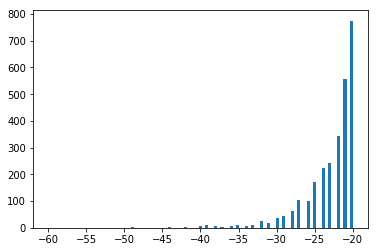

In [115]:
plt.hist(delays_Q4[delays_Q4['dep_delay']< -10]['dep_delay'],
        bins = np.linspace(-60,-20,100));

In [121]:
delays_Q4[delays_Q4['dep_delay']< -40]

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,arr_delay,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier,total_delay
253812,10,11,4,2018-10-11,OO,5471,ORD,"Chicago, IL",IL,Illinois,SCE,"State College, PA",PA,Pennsylvania,-42.0,-30.0,528.0,0.0,0.0,0.0,0.0,0.0,Delta Connection,0.0
267584,10,26,5,2018-10-26,OO,7408,PLN,"Pellston, MI",MI,Michigan,APN,"Alpena, MI",MI,Michigan,-41.0,-31.0,69.0,0.0,0.0,0.0,0.0,0.0,Delta Connection,0.0
663608,11,3,6,2018-11-03,AS,66,YAK,"Yakutat, AK",AK,Alaska,JNU,"Juneau, AK",AK,Alaska,-44.0,-31.0,198.0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines,0.0
664862,11,5,1,2018-11-05,AS,61,YAK,"Yakutat, AK",AK,Alaska,CDV,"Cordova, AK",AK,Alaska,-43.0,-26.0,213.0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines,0.0
665563,11,6,2,2018-11-06,AS,66,YAK,"Yakutat, AK",AK,Alaska,JNU,"Juneau, AK",AK,Alaska,-42.0,-41.0,198.0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines,0.0
672441,11,27,2,2018-11-27,AS,61,YAK,"Yakutat, AK",AK,Alaska,CDV,"Cordova, AK",AK,Alaska,-49.0,-42.0,213.0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines,0.0
672460,11,27,2,2018-11-27,AS,66,YAK,"Yakutat, AK",AK,Alaska,JNU,"Juneau, AK",AK,Alaska,-49.0,-50.0,198.0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines,0.0
985180,11,13,2,2018-11-13,UA,105,SPN,"Saipan, TT",TT,U.S. Pacific Trust Territories and Possessions,GUM,"Guam, TT",TT,U.S. Pacific Trust Territories and Possessions,-47.0,-52.0,129.0,0.0,0.0,0.0,0.0,0.0,United Airlines,0.0
985181,11,13,2,2018-11-13,UA,104,GUM,"Guam, TT",TT,U.S. Pacific Trust Territories and Possessions,SPN,"Saipan, TT",TT,U.S. Pacific Trust Territories and Possessions,-92.0,-87.0,129.0,0.0,0.0,0.0,0.0,0.0,United Airlines,0.0
990525,11,6,2,2018-11-06,UA,105,SPN,"Saipan, TT",TT,U.S. Pacific Trust Territories and Possessions,GUM,"Guam, TT",TT,U.S. Pacific Trust Territories and Possessions,-122.0,-120.0,129.0,0.0,0.0,0.0,0.0,0.0,United Airlines,0.0


In [126]:
delays_Q4 = delays_Q4[delays_Q4['dep_delay']> -40]

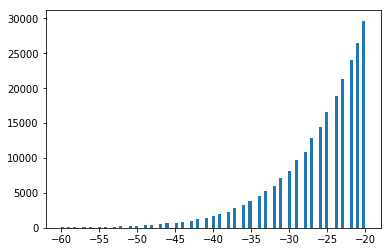

In [105]:
plt.hist(delays_Q4[delays_Q4['arr_delay']< -10]['arr_delay'],
        bins = np.linspace(-60,-20,100));

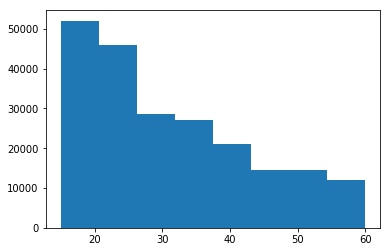

In [132]:
plt.hist(delays_Q4[delays_Q4['total_delay']>15]['total_delay'],
        bins = np.linspace(15,60,9));

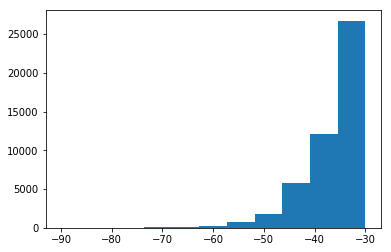

In [138]:
plt.hist(delays_Q4[delays_Q4['arr_delay']<-30]['arr_delay'],
        bins = np.linspace(-90,-30,12));

In [140]:
delays_Q4[delays_Q4['arr_delay']<-60].shape

(276, 24)

In [146]:
delays_Q4[delays_Q4['arr_delay']==0]['total_delay'].value_counts()

0.0    37274
Name: total_delay, dtype: int64

In [158]:
delays_Q4[delays_Q4['arr_delay']<0]['total_delay'].value_counts()

0.0    1108966
Name: total_delay, dtype: int64

In [162]:
delays_Q4[delays_Q4['arr_delay']>15].shape

(309610, 24)

In [161]:
delays_Q4[delays_Q4['total_delay']>0].shape

(322116, 24)

In [163]:
delays_Q4[delays_Q4['arr_delay']<-60].shape #outliers!

(276, 24)

In [164]:
delays_Q4[delays_Q4['arr_delay']<-60].shape[0]/delays_Q4.shape[0]

0.00015545433500747138

In [165]:
delays_Q4 = delays_Q4[delays_Q4['arr_delay']>-60]

In [167]:
delays_Q4.describe().T

,count,mean,std,min,25%,50%,75%,max
month,1775112.0,10.986087,0.820784,10.0,10.0,11.0,12.0,12.0
day_of_month,1775112.0,15.804770,8.819088,1.0,8.0,16.0,23.0,31.0
day_of_week,1775112.0,3.929362,2.008412,1.0,2.0,4.0,6.0,7.0
op_carrier_fl_num,1775112.0,2612.562232,1842.974919,1.0,1066.0,2180.0,4014.0,7909.0
dep_delay,1775112.0,8.419352,42.617156,-39.0,-6.0,-2.0,5.0,2109.0
arr_delay,1775112.0,3.803098,44.869790,-59.0,-14.0,-6.0,7.0,2153.0
distance,1775112.0,796.862081,593.713766,31.0,363.0,631.0,1027.0,4983.0
carrier_delay,1775112.0,0.046855,0.211327,0.0,0.0,0.0,0.0,1.0
weather_delay,1775112.0,0.004480,0.066781,0.0,0.0,0.0,0.0,1.0
nas_delay,1775112.0,0.057729,0.233230,0.0,0.0,0.0,0.0,1.0


In [168]:
delays_Q4[delays_Q4['distance'] == 4983]

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,arr_delay,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier,total_delay
519184,10,1,1,2018-10-01,HA,50,HNL,"Honolulu, HI",HI,Hawaii,JFK,"New York, NY",NY,New York,-6.0,6.0,4983.0,0.0,0.0,0.0,0.0,0.0,Hawaiian Airlines,0.0
519185,10,2,2,2018-10-02,HA,50,HNL,"Honolulu, HI",HI,Hawaii,JFK,"New York, NY",NY,New York,0.0,-1.0,4983.0,0.0,0.0,0.0,0.0,0.0,Hawaiian Airlines,0.0
519186,10,3,3,2018-10-03,HA,50,HNL,"Honolulu, HI",HI,Hawaii,JFK,"New York, NY",NY,New York,13.0,20.0,4983.0,1.0,0.0,0.0,0.0,0.0,Hawaiian Airlines,20.0
519187,10,4,4,2018-10-04,HA,50,HNL,"Honolulu, HI",HI,Hawaii,JFK,"New York, NY",NY,New York,4.0,3.0,4983.0,0.0,0.0,0.0,0.0,0.0,Hawaiian Airlines,0.0
519188,10,5,5,2018-10-05,HA,50,HNL,"Honolulu, HI",HI,Hawaii,JFK,"New York, NY",NY,New York,5.0,2.0,4983.0,0.0,0.0,0.0,0.0,0.0,Hawaiian Airlines,0.0
519189,10,6,6,2018-10-06,HA,50,HNL,"Honolulu, HI",HI,Hawaii,JFK,"New York, NY",NY,New York,-5.0,-1.0,4983.0,0.0,0.0,0.0,0.0,0.0,Hawaiian Airlines,0.0
519190,10,7,7,2018-10-07,HA,50,HNL,"Honolulu, HI",HI,Hawaii,JFK,"New York, NY",NY,New York,38.0,55.0,4983.0,0.0,0.0,0.0,1.0,0.0,Hawaiian Airlines,55.0
519191,10,8,1,2018-10-08,HA,50,HNL,"Honolulu, HI",HI,Hawaii,JFK,"New York, NY",NY,New York,4.0,15.0,4983.0,1.0,0.0,0.0,0.0,0.0,Hawaiian Airlines,15.0
519192,10,9,2,2018-10-09,HA,50,HNL,"Honolulu, HI",HI,Hawaii,JFK,"New York, NY",NY,New York,-1.0,-12.0,4983.0,0.0,0.0,0.0,0.0,0.0,Hawaiian Airlines,0.0
519193,10,10,3,2018-10-10,HA,50,HNL,"Honolulu, HI",HI,Hawaii,JFK,"New York, NY",NY,New York,-1.0,-15.0,4983.0,0.0,0.0,0.0,0.0,0.0,Hawaiian Airlines,0.0


In [169]:
delays_Q4[delays_Q4['total_delay'] == 2153]

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,arr_delay,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier,total_delay
339693,10,21,7,2018-10-21,AA,1679,BDL,"Hartford, CT",CT,Connecticut,PHL,"Philadelphia, PA",PA,Pennsylvania,2109.0,2153.0,196.0,1.0,0.0,0.0,0.0,0.0,American Airlines,2153.0


In [170]:
delays_Q4[delays_Q4['arr_delay'] > 1440]

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,arr_delay,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier,total_delay
232057,10,23,2,2018-10-23,YV,5796,OAK,"Oakland, CA",CA,California,PHX,"Phoenix, AZ",AZ,Arizona,1723.0,1773.0,646.0,1.0,0.0,0.0,0.0,0.0,MESA,1773.0
274415,10,13,6,2018-10-13,AA,1478,RDU,"Raleigh/Durham, NC",NC,North Carolina,DFW,"Dallas/Fort Worth, TX",TX,Texas,1822.0,1866.0,1061.0,1.0,0.0,0.0,0.0,0.0,American Airlines,1866.0
287638,10,20,6,2018-10-20,AA,2583,BNA,"Nashville, TN",TN,Tennessee,DFW,"Dallas/Fort Worth, TX",TX,Texas,1555.0,1537.0,631.0,1.0,0.0,0.0,0.0,0.0,American Airlines,1537.0
339693,10,21,7,2018-10-21,AA,1679,BDL,"Hartford, CT",CT,Connecticut,PHL,"Philadelphia, PA",PA,Pennsylvania,2109.0,2153.0,196.0,1.0,0.0,0.0,0.0,0.0,American Airlines,2153.0
420639,10,9,2,2018-10-09,EV,4308,CLE,"Cleveland, OH",OH,Ohio,LGA,"New York, NY",NY,New York,1422.0,1443.0,419.0,0.0,0.0,1.0,0.0,0.0,United Express,1443.0
498686,10,29,1,2018-10-29,YV,5729,SBA,"Santa Barbara, CA",CA,California,PHX,"Phoenix, AZ",AZ,Arizona,1558.0,1576.0,455.0,1.0,0.0,0.0,0.0,0.0,MESA,1576.0
499292,10,22,1,2018-10-22,YV,5744,IAH,"Houston, TX",TX,Texas,PHX,"Phoenix, AZ",AZ,Arizona,1487.0,1478.0,1009.0,1.0,0.0,0.0,0.0,0.0,MESA,1478.0
561070,10,2,2,2018-10-02,AA,1189,TPA,"Tampa, FL",FL,Florida,DFW,"Dallas/Fort Worth, TX",TX,Texas,1460.0,1477.0,929.0,0.0,0.0,0.0,0.0,1.0,American Airlines,1477.0
630206,11,25,7,2018-11-25,AA,2787,BNA,"Nashville, TN",TN,Tennessee,DFW,"Dallas/Fort Worth, TX",TX,Texas,1573.0,1585.0,631.0,1.0,0.0,0.0,0.0,0.0,American Airlines,1585.0
648670,11,27,2,2018-11-27,EV,4057,PWM,"Portland, ME",ME,Maine,EWR,"Newark, NJ",NJ,New Jersey,1505.0,1553.0,284.0,1.0,0.0,0.0,0.0,0.0,United Express,1553.0


In [171]:
delays_Q4.to_csv('~/ga/projects/capstone_data/data/delaysQ4_2018_cleaned.csv')